<a href="https://colab.research.google.com/github/mbhuiyan1/Statistical-Data-Mining-in-Python/blob/main/Logistic_regression_tuning_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, roc_auc_score


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
##########################################################
##                1. Reading the Data                   ##
##########################################################
myData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/untitled folder/PROJECT_1/BreastCancer.csv')



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 60.2+ KB


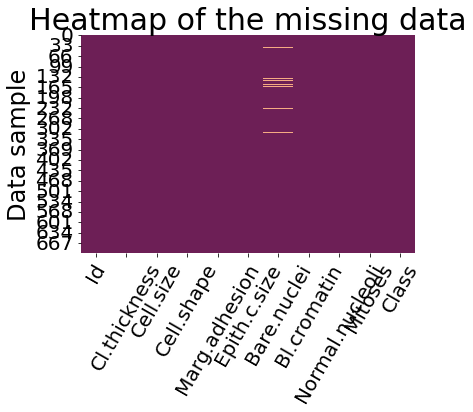

In [6]:
##########################################################
##                2. Data Preparation                   ##
##########################################################
print('\nData info:')
myData.info()

# Remove duplicated rows:
myData = myData.drop_duplicates(keep='first')

# Inspect duplicated Ids:
dupId = myData.loc[myData.Id.duplicated(keep=False)]

# Get missing data:
missing = myData.isnull()
# Visualize missing data:
plt.figure()
sb.heatmap(missing, cbar=False, vmin=-.5, vmax=1.3)
plt.ylabel('Data sample',size=24)
plt.title('Heatmap of the missing data',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.xticks(rotation=60)
plt.show()

In [7]:
# Print percentage of missing data:
missPercent = 100*missing.sum()/len(missing.index)
print('\nPercentage of missing data:')
print(missPercent)


Percentage of missing data:
Id                 0.000000
Cl.thickness       0.000000
Cell.size          0.000000
Cell.shape         0.000000
Marg.adhesion      0.000000
Epith.c.size       0.000000
Bare.nuclei        2.315485
Bl.cromatin        0.000000
Normal.nucleoli    0.000000
Mitoses            0.000000
Class              0.000000
dtype: float64


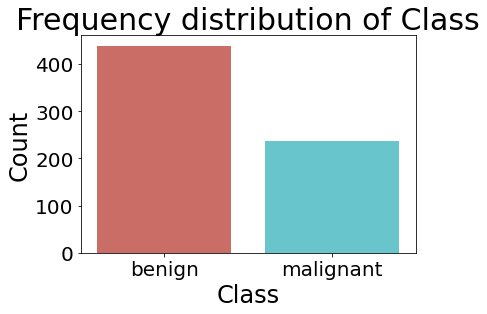

In [8]:
# Drop rows with missing values:
myData.dropna(axis=0, inplace=True)

# Frequency distribution of Class:
plt.figure()
sb.countplot(x='Class',data=myData, palette='hls')
plt.ylabel('Count',size=24)
plt.xlabel('Class',size=24)
plt.title('Frequency distribution of Class',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.show()

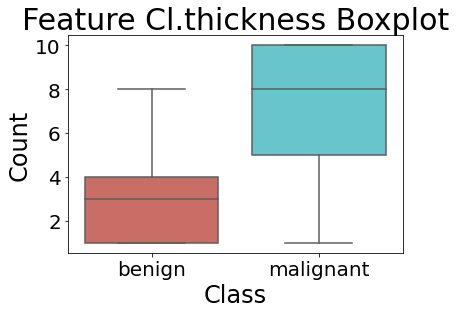

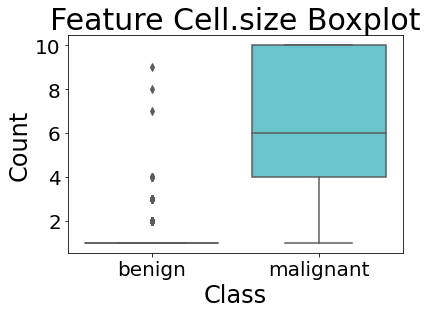

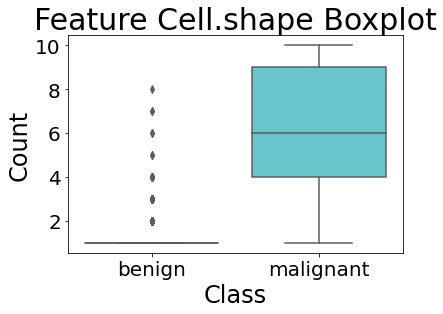

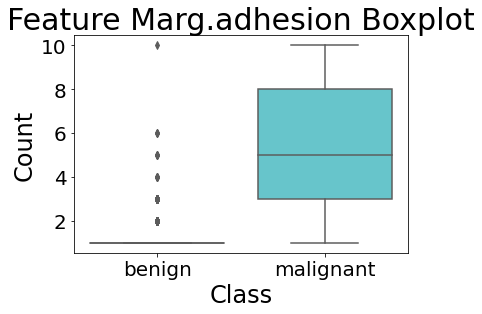

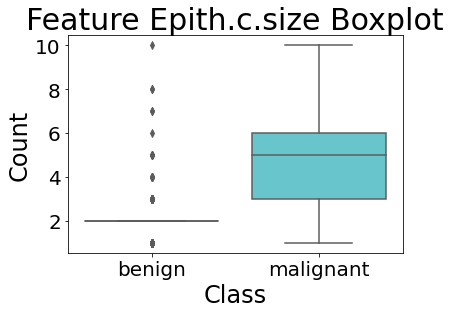

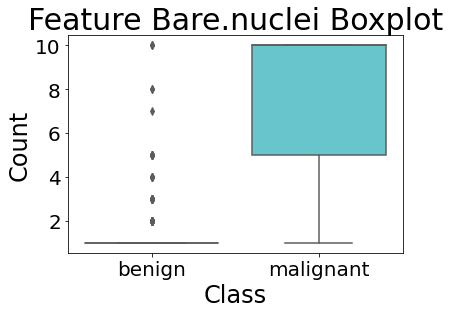

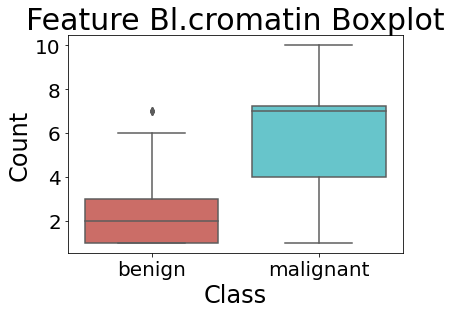

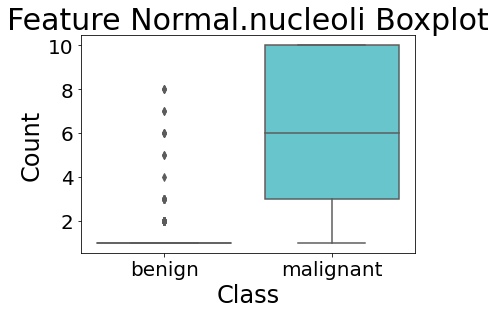

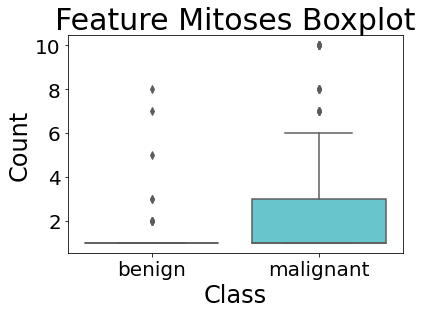

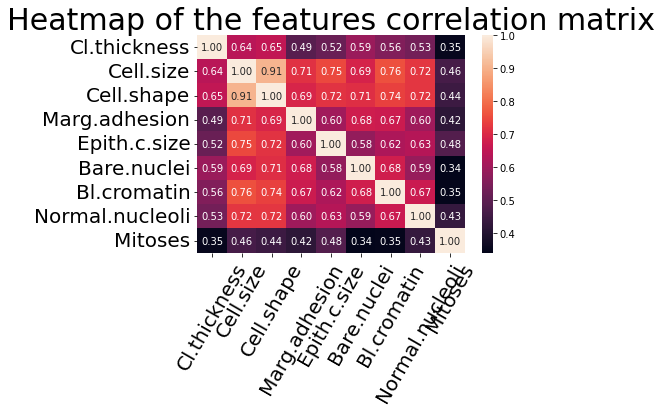

In [9]:
# Create boxplots to see the asociation between Class and other attributes:
numData = myData.drop(columns=['Id'])
for i in numData.keys():
    if (numData.dtypes[i] == np.int64 or myData.dtypes[i] == np.float64):
        plt.figure()
        sb.boxplot(x='Class', y=i, data=numData, palette='hls')
        plt.ylabel('Count',size=24)
        plt.xlabel('Class',size=24)
        plt.title('Feature '+i+' Boxplot',fontsize=30)
        plt.tick_params(axis='both',labelsize=20)
        plt.show()
        
# Visualize correlation matrix:
datCorr = numData.corr()
plt.figure()
sb.heatmap(datCorr, annot=True, fmt='.2f')
plt.title('Heatmap of the features correlation matrix',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.xticks(rotation=60)
plt.show()
        

In [10]:
##########################################################
##                3. Data Partitioning                  ##
##########################################################
# Features (Class and Id columns are removed from the original dataset):
X = myData.drop(columns=['Class','Id'])
# Target (Class column is taken from the original dataset):
y = myData[['Class']].copy()
# Map class variables to a number (benign=1, malignant=0):
y = y[['Class']].replace('benign',1)
y = y[['Class']].replace('malignant',0)
# Partition data: 50% for training, 25% for validation, 25% for testing:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=27, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=2305, stratify=y_val)


In [11]:
##########################################################
##            4. Logistic regression model              ##
##########################################################
## Define several values for lambda:
#myLambda = np.linspace(.0001,.5,5000)   
#myLambda = np.round(myLambda,4)
#missRate = np.zeros((len(myLambda),))
#mse = np.zeros((len(myLambda),))
#
#for i in range(0,len(myLambda)):
#    # alpha in python = lambda in R, and ElasticNet is Lasso when l1_ratio=1:
#    myModel = ElasticNet(alpha=myLambda[i], l1_ratio=1)
#    #myModel = SGDClassifier(loss="log", penalty="elasticnet", alpha=myLambda[i], l1_ratio=1)
#    myModel.fit(X_train,y_train)
#    pred = myModel.predict(X_val)
#    pred = pd.DataFrame(pred)
#    pred = pred.drop(columns=[0])
#    # Get the missclassification rate (percentage of  missclassified variables):
#    missRate[i] = 1-accuracy_score(pred>.5,y_val)
#    # Get mean squared error:
#    mse[i] = mean_squared_error(y_val,pred)
#    

############################
    # Define several values for lambda:
myLambda = np.linspace(.0001,.5,5000)
myLambda = np.round(myLambda,4)
missRate = np.zeros((len(myLambda),))
mse = np.zeros((len(myLambda),))
for i in range(0,len(myLambda)):
    # alpha in python = lambda in R, and ElasticNet is Lasso when l1_ratio=1:
    myModel = ElasticNet(alpha=myLambda[i], l1_ratio=1)
    myModel.fit(X_train,y_train)
    pred = myModel.predict(X_val)
    # Get the misclassification rate (percentage of  misclassified variables):
    missRate[i] = 1-accuracy_score(pred>.5,y_val)

 # Get mean squared error:
    mse[i] = mean_squared_error(y_val,pred)

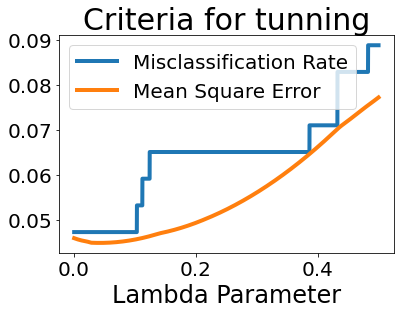

In [12]:
# Visualize the misclassification rate and mse as a function of lambda:
plt.figure()
plt.plot(myLambda,missRate,linewidth=4)
plt.plot(myLambda,mse,linewidth=4)
plt.xlabel('Lambda Parameter',size=24)
plt.title('Criteria for tunning',fontsize=30)
plt.legend(['Misclassification Rate','Mean Square Error'],prop={'size':20})
plt.tick_params(axis='both',labelsize=20)
plt.show()


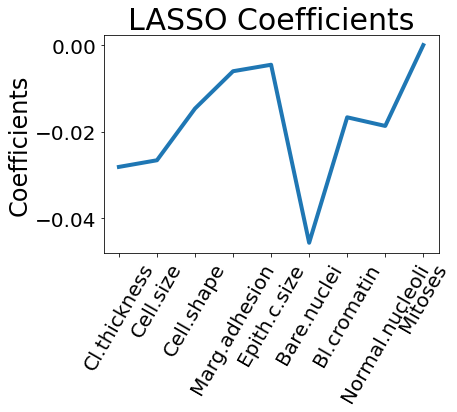

In [13]:
# Get the best lambda:
optimInd = np.where(mse==min(mse))
bestLambda = myLambda[optimInd]


# Fit best model by pooling training and validation data together:
X_12 = pd.concat([X_train, X_val])
y_12 = pd.concat([y_train, y_val])
# alpha in python = lambda in R, and ElasticNet is Lasso when l1_ratio=1
bestModel = ElasticNet(alpha=bestLambda, l1_ratio=1)
#bestModel = SGDClassifier(loss="log", penalty="elasticnet", alpha=bestLambda, l1_ratio=1)    
bestModel.fit(X_12,y_12)

# Plot the LASSO coefficients to find out the most important predictors:
lassoCoef = bestModel.coef_
plt.figure()
plt.plot(range(len(X_12.columns)), lassoCoef,linewidth=4)
plt.tick_params(axis='both',labelsize=20)
plt.xticks(range(len(X_12.columns)), X_12.columns, rotation=60)
plt.ylabel('Coefficients',size=24)
plt.title('LASSO Coefficients',fontsize=30)
plt.show()

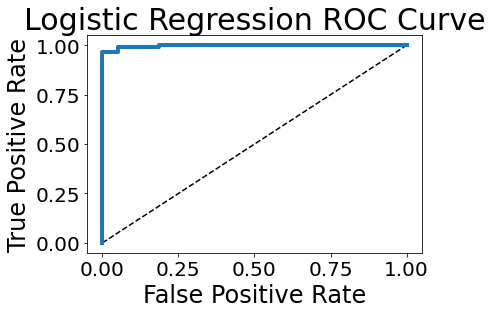

0.9969183359013868


In [14]:
# Apply model to test data:
testPred = bestModel.predict(X_test)
# Get the ROC curve:
fpr, tpr, thresh = roc_curve(y_test,testPred)
plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Logistic Regression ROC Curve',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.show()
# Get the AUC metric:
AUC = roc_auc_score(y_test,testPred)
print(AUC)
